In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
url="https://raw.githubusercontent.com/Prodigy-InfoTech/data-science-datasets/refs/heads/main/Task%204/twitter_training.csv"
df = pd.read_csv(url, header=None)


df.columns = ["id", "entity", "sentiment", "text"]

df = df[["sentiment", "text"]]

# Drop rows with missing values in the 'text' column
df = df.dropna(subset=['text'])

print(df.head())

  sentiment                                               text
0  Positive  im getting on borderlands and i will murder yo...
1  Positive  I am coming to the borders and I will kill you...
2  Positive  im getting on borderlands and i will kill you ...
3  Positive  im coming on borderlands and i will murder you...
4  Positive  im getting on borderlands 2 and i will murder ...


In [8]:

df = df.dropna(subset=["text"])

df = df[df["text"].str.strip() != ""]


/tmp/ipython-input-237293204.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="sentiment", order=df["sentiment"].value_counts().index, palette="Set2")


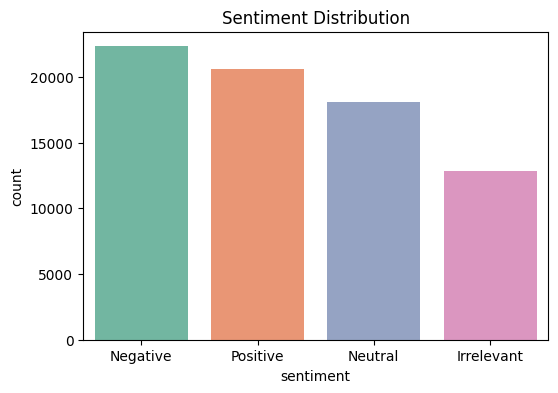

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="sentiment", order=df["sentiment"].value_counts().index, palette="Set2")
plt.title("Sentiment Distribution")
plt.show()


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    df["text"], df["sentiment"], test_size=0.2, random_state=42
)


In [11]:
vectorizer = CountVectorizer(stop_words="english")
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [12]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)


MultinomialNB()

In [13]:
y_pred = model.predict(X_test_vec)


In [14]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7610565526583136

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.85      0.65      0.74      2561
    Negative       0.72      0.85      0.78      4504
     Neutral       0.83      0.67      0.74      3582
    Positive       0.73      0.81      0.77      4118

    accuracy                           0.76     14765
   macro avg       0.78      0.75      0.76     14765
weighted avg       0.77      0.76      0.76     14765



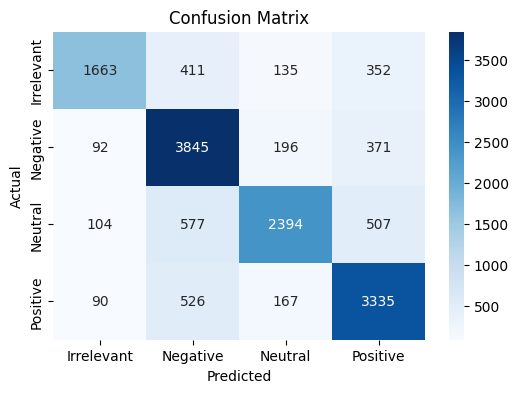

In [15]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


/tmp/ipython-input-2283939331.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_acc.keys()), y=list(class_acc.values()), palette="Set1")


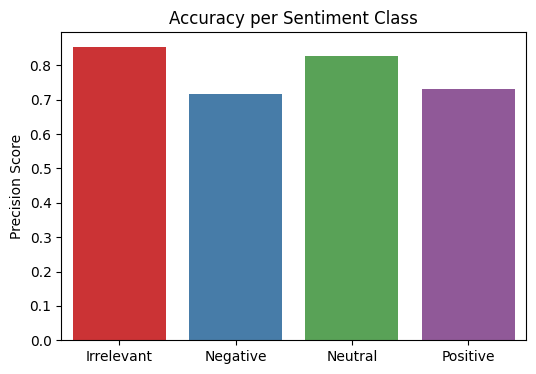

In [16]:
report = classification_report(y_test, y_pred, output_dict=True)
class_acc = {label: report[label]["precision"] for label in model.classes_}

plt.figure(figsize=(6,4))
sns.barplot(x=list(class_acc.keys()), y=list(class_acc.values()), palette="Set1")
plt.title("Accuracy per Sentiment Class")
plt.ylabel("Precision Score")
plt.show()
